In [2]:
from __future__ import division, absolute_import, print_function
from hepran.bzipscore import *
import hepran.utils as u
import hepran.registers as r
import os
os.chdir(r"D:\data\ortoCC\design-with-alignments\4heptade-7")
print(os.getcwd())

#score the fasta (takes about 10 min)
#!{CCO}/fastscore.exe full4heptad.fasta --out-name=full4heptad_B07 --align=-7,0,7 --orientation=B

name = '4h-all-same_GE'

#cutoff line:
al = "B07"
delta = 1
dir_name = name+"-DEL1.00"
input_fasta = 'full4heptad.fasta'
input_score_file = 'full4heptad_B07.bin'
#Filtering
ids = get_ids_from_fasta(input_fasta)
fasta = u.load_fasta(input_fasta)


filtered_ids = [i for i in ids if (r.same_ge(fasta[i], 'f'))]
print(len(filtered_ids))


filtered_fasta = name+'.fasta'
filter_fasta(fasta, filtered_ids, filtered_fasta)
score_file = name+'_'+al+'.bin'
print(score_file)
filter_bin_score_file(input_score_file, input_fasta, filtered_ids, score_file)

D:\data\ortoCC\design-with-alignments\4heptade-7
256
4h-all-same_GE_B07.bin


In [18]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2
import os

import hepran
from hepran.bzipscore import *
import hepran.utils as u
import hepran.registers as r
import numpy as np
CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")
from glob import glob
import pandas as pd
from StringIO import StringIO

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk',  font_scale=1.5)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
c_list = []
print(dir_name)
for bc in np.linspace(-9,-7.5, 31):
    nc = bc + delta
    cutoff = u.Cutoff(binding=bc, nonbinding=nc)
    c_list.append(cutoff)
            
print(len(c_list))
c_list;

4h-all-same_GE-DEL1.00
31


In [5]:
%%time
for cutoff in c_list:
    print(cutoff)
    a_dir, set_files = get_sets(dir_name+"/"+name, binding_cutoff=cutoff.binding, nonbinding_cutoff=cutoff.nonbinding,
                                 alignment=al,
                                 fasta=filtered_fasta, score_file=score_file,
                                 solver_exe=CCO+"/solver.exe", fake=False, verbose=False, skip_existing=False,
                                 timeout_s=1600)
    for set_file in set_files:
        print(set_file)
        analyse_set_file(set_file, filtered_fasta, alignment="B07",
                         scorer_exe=CCO+"/fastscore.exe", verbose=False, skip_drawing=True)
        

Cutoff(binding=-9.0, nonbinding=-8.0)
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-9.00_nc-8.00/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-9.00_nc-8.00/hetero.00.set
Cutoff(binding=-8.9499999999999993, nonbinding=-7.9499999999999993)

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-9.00_nc-8.00/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.95_nc-7.95/homo.set.current
  warnings.warn("File does not exist: " + current_name)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.95_nc-7.95/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.95_nc-7.95/hetero.00.set
Cutoff(binding=-8.9000000000000004, nonbinding=-7.9000000000000004)
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.90_nc-7.90/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.90_nc-7.90/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.90_nc-7.90/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.90_nc-7.90/hetero.01.set
Cutoff(binding=-8.8499999999999996, nonbinding=-7.8499999999999996)

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.90_nc-7.90/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.85_nc-7.85/homo.set.current
  warnings.warn("File does not exist: " + current_name)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.85_nc-7.85/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.85_nc-7.85/hetero.00.set
Cutoff(binding=-8.8000000000000007, nonbinding=-7.8000000000000007)
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.80_nc-7.80/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.80_nc-7.80/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.80_nc-7.80/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.80_nc-7.80/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.80_nc-7.80/hetero.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.80_nc-7.80/hetero.02.set
Cutoff(binding=-8.75, nonbinding=-7.75)

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.80_nc-7.80/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/homo.set.current
  warnings.warn("File does not exist: " + current_name)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/all.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/all.05.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/all.06.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/all.07.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/all.08.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/hetero.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/hetero.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/hetero.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.75_nc-7.75/hetero.04.set
4h-all-same_GE-DEL

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.70_nc-7.70/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.65_nc-7.65/homo.set.current
  warnings.warn("File does not exist: " + current_name)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.65_nc-7.65/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.65_nc-7.65/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.65_nc-7.65/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.65_nc-7.65/all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.65_nc-7.65/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.65_nc-7.65/hetero.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.65_nc-7.65/hetero.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.65_nc-7.65/hetero.03.set
Cutoff(binding=-8.5999999999999996, nonbinding=-7.5999999999999996)
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60/all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60/all.04.set
4h-all-same_GE-DEL1.00

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/homo.set.current
  warnings.warn("File does not exist: " + current_name)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/all.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/all.05.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/all.06.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/all.07.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/hetero.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/hetero.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/hetero.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/hetero.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.55_nc-7.55/hetero.05.set
4h-all-same_GE-

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.50_nc-7.50/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.45_nc-7.45/homo.set.current
  warnings.warn("File does not exist: " + current_name)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.45_nc-7.45/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.45_nc-7.45/hetero.00.set
Cutoff(binding=-8.4000000000000004, nonbinding=-7.4000000000000004)
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/all.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/all.05.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/all.06.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/all.07.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/hetero.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/hetero.02.set
4h-all-same_GE-DEL1.00

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.40_nc-7.40/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/homo.set.current
  warnings.warn("File does not exist: " + current_name)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/all.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/all.05.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/hetero.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/hetero.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/hetero.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/hetero.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.35_nc-7.35/hetero.05.set
Cutoff(binding=-8.3000000000000007, nonbinding=-7.3000000000000007)
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.30_nc-7.30/all.00.set
4h-all-same_GE-D

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.30_nc-7.30/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/homo.set.current
  warnings.warn("File does not exist: " + current_name)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/all.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/all.05.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/all.06.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/all.07.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/hetero.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/hetero.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/hetero.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/hetero.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.25_nc-7.25/hetero.05.set
Cutoff(binding=

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.20_nc-7.20/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/homo.set.current
  warnings.warn("File does not exist: " + current_name)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/all.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/all.05.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/all.06.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/all.07.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/all.08.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.15_nc-7.15/hetero.01.set
Cutoff(binding=-8.0999999999999996, nonbinding=-7.0999999999999996)
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.10_nc-7.10/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.10_nc-7.10/hetero.00.set
Cutoff(binding=-8.0500000

c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:1037: UserWarning: File does not exist: 4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.10_nc-7.10/homo.set.current
  warnings.warn("File does not exist: " + current_name)
c:\projekti_ki\ortocc\agadir\hepran\bzipscore.py:363: RuntimeWarning: invalid value encountered in true_divide
  mat = mat / np.nanmax(mat)



4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.05_nc-7.05/homo.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.05_nc-7.05/hetero.00.set
Cutoff(binding=-8.0, nonbinding=-7.0)
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/all.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/all.05.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/all.06.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/all.07.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/homo.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/homo.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.00/hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.00_nc-7.

C:\bin\python\anaconda\lib\site-packages\numpy\lib\nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)


In [6]:
set_infos = glob(dir_name+"/*/*.set_info")
df = load_set_infos_to_dataframe(set_infos)

In [7]:
mp = get_max_pairs_by_type(df)
mp.sort_values(by="binding_cutoff", inplace=True)
mp.reset_index(inplace=True)
mp

,dirname,type,max_N_pairs,binding_cutoff,nonbinding_cutoff,count_all_sets,set_names,count_max_sets
0,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-9...,hetero,4,-9.00,-8.00,1,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-9...,1
1,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-9...,all,4,-9.00,-8.00,1,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-9...,1
2,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-8...,all,5,-8.95,-7.95,1,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8...,1
3,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-8...,hetero,5,-8.95,-7.95,1,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8...,1
4,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-8...,hetero,5,-8.90,-7.90,2,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8...,2
5,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-8...,all,5,-8.90,-7.90,2,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8...,2
6,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-8...,hetero,5,-8.85,-7.85,1,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8...,1
7,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-8...,all,5,-8.85,-7.85,1,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8...,1
8,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-8...,hetero,5,-8.80,-7.80,3,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8...,3
9,4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-8...,all,5,-8.80,-7.80,3,4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8...,3


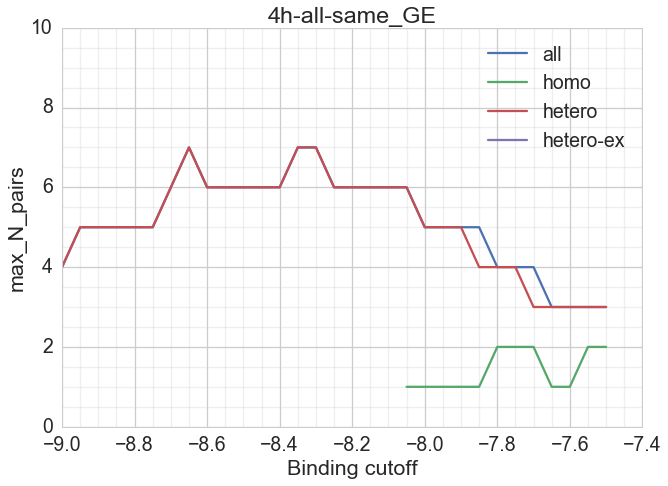

In [23]:
#%matplotlib notebook

plt.figure()
for pair_type in ["all", "homo", "hetero", "hetero-ex"]:
    df_type = mp[mp.type == pair_type]
    if len(df_type)>0:
        plt.plot(df_type.binding_cutoff, df_type.max_N_pairs, label=pair_type)
    
plt.title(name)   
plt.ylim(0,10)
plt.grid(which='minor', alpha=0.3)
plt.minorticks_on()
plt.legend()
plt.ylabel("max_N_pairs")
plt.xlabel("Binding cutoff")

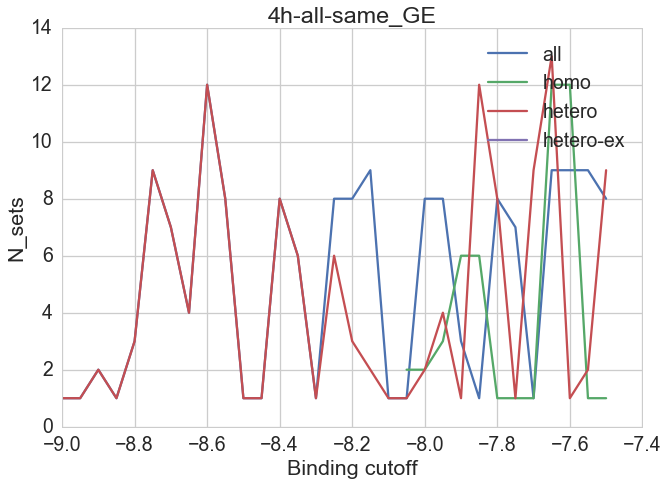

In [22]:
plt.figure()
for pair_type in ["all", "homo", "hetero", "hetero-ex"]:
    df_type = mp[mp.type == pair_type]
    if len(df_type)>0:
        plt.plot(df_type.binding_cutoff, df_type.count_max_sets, label=pair_type)

plt.title(name)  
plt.legend()
plt.ylabel("N_sets")
plt.xlabel("Binding cutoff")
#plt.ylim([0, 15])

In [10]:
#analyse set files
df_to_plot = df[-8>=df.binding_cutoff]
set_files = list(df_to_plot["!full_name"])

dirs = [os.path.dirname(sf) for sf in set_files]
dirs = list(set(dirs))

all_set_files = []
for d in dirs:
    sf = glob(d+"/*.set")
    all_set_files += sf
all_set_files

['4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.00.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.01.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.02.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.03.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.04.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.05.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.06.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.07.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.08.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.09.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.10.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\all.11.set',
 '4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\\hetero.00.set',
 '4h-all-same_GE-DEL1.00/4h-all-sam

In [11]:
%%time
comp = analyse_sets(all_set_files, filtered_fasta, alignment="B07", scorer_exe=CCO+"/fastscore.exe", 
                      username="ajasja", password="agrftAGADIR", serial=False)
for r in comp:
    print(r)

4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.01.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.02.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.03.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.04.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.05.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.06.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.07.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.08.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.09.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.10.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\all.11.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\hetero.00.set
4h-all-same_GE-DEL1.00/4h-all-same_GE_B07_bc-8.60_nc-7.60\hetero.01.set
4h-all-same_GE-DEL1.00/4h-al

In [12]:
sns.set_context('talk',  font_scale=1)
sns.set_style('white')

dirs = glob(dir_name+"/*")
dir_name

'4h-all-same_GE-DEL1.00'

In [13]:
for d in dirs:
    draw_overlap_matrix(d, close=True);    
    draw_overlap_matrix(d, kind="peptides",close=True);

4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.50_nc-6.50/pairs_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.50_nc-6.50/pairs_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.50_nc-6.50/peptides_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.50_nc-6.50/peptides_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.55_nc-6.55/pairs_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.55_nc-6.55/pairs_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.55_nc-6.55/peptides_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.55_nc-6.55/peptides_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.60_nc-6.60/pairs_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.60_nc-6.60/pairs_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.60_nc-6.60/peptides_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.60_nc-6.60/peptides_overlap.png
4h-all-same_GE-DEL1.00\4h-all-same_GE_B07_bc-7.65_nc-6.65/pairs_overla

In [14]:
u.load_set_file(all_set_files[-1])

[['P1046', 'P3961'],
 ['P1072', 'P3907'],
 ['P1193', 'P4038'],
 ['P1368', 'P3643'],
 ['P1387', 'P3592']]

In [15]:
mat = get_overlaps_num_matrix(set_files)

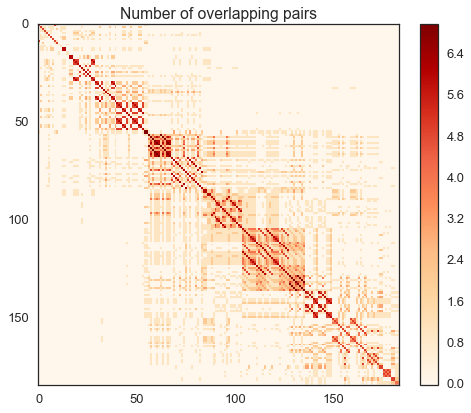

In [16]:
plot_matrix_mpl(mat, close=False, cmap="OrRd");
#plt.xlim([0, 150])
#plt.ylim([0, 150])
plt.title("Number of overlapping pairs")